Here are some recommended packages, not all are required and depends on your solution.

In [78]:
# imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
import io
import requests
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# allow plots to appear directly in the notebook
%matplotlib inline

## Questions

You are a consultant for a company that sells widgets.  They have historical data on their sales on their investments in advertising in various media outlets, including TV, radio, and newspapers.  On the basis of this data, how should they be spending their advertising money in the future?

Your analysis should answer the following questions:

Is there a relationship between ads and sales?

How strong is that relationship?

Which ad types contribute to sales?

What is the effect of each ad type of sales?

Given ad spending in a particular market, can sales be predicted?

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


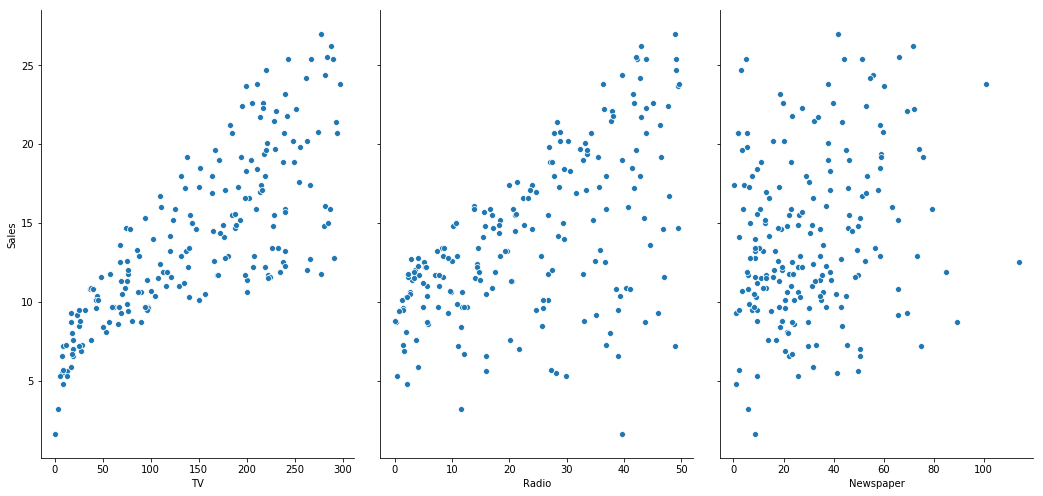

In [21]:
# read data into a DataFrame, this is money spent on different medias
url = 'https://raw.githubusercontent.com/lneisenman/isl/master/data/Advertising.csv'
s = requests.get(url).content
data = pd.read_csv(io.StringIO(s.decode('utf-8')))

#data = pd.read_csv('https://raw.githubusercontent.com/lneisenman/isl/master/data/Advertising.csv', index_col=0)
print(data.head())
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=7, aspect=0.7)


In [7]:
data.shape

(200, 5)

In the lecture, we covered how to perform a linear regression model.  We did not however explore how "good" this model is.  The task below will have you identifying ways to evaluate a linear regression model.

Machine learning focuses on what the model predicts. If you would like to dive into the meaning of fit parameters within the model, other tools are available, including the Statsmodels Python package. Take some time to look at this [package](https://www.statsmodels.org/stable/regression.html) and also an [example of evaluating a linear regression](https://www.statsmodels.org/stable/examples/notebooks/generated/gls.html).

Similar to Scikit-learn, one can calculate the intercept and coefficient for a linear fit for a set of data.  

In [14]:
compare = smf.ols(formula='Sales ~ TV', data=data).fit()
compare.params[1]

0.047536640433019764

A confidence interval can be used to describe a linear model.  How would you calculate the confidence interval of this model and what does this confidence interval mean?

In [74]:
compare.conf_int(alpha=0.05, cols=None)

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [81]:
res = sm.OLS(data['Sales'], data['TV']).fit()
prstd,iv_l, iv_u = wls_prediction_std(res)

In [15]:
print(compare.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 04 Oct 2019   Prob (F-statistic):           1.47e-42
Time:                        13:01:51   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

Other metrics that are used to describe the appropriateness of a model is a p-value.  How would you calculate the p-value and r-squared values of the model?  What do these values mean?

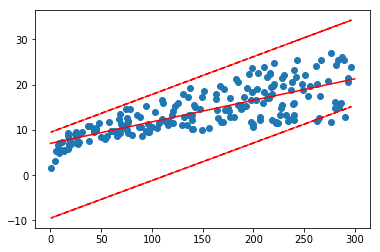

In [82]:
#x = data['TV']
x = np.linspace(0, 300, 1000)
plt.scatter(data['TV'],data['Sales'])
plt.plot(data['TV'], iv_u, 'r--')
plt.plot(data['TV'], iv_l, 'r--')
plt.plot(x, (compare.params[0] + (compare.params[1]*x)), color = 'red')

In [27]:
compare2 = smf.ols(formula='Sales ~ Radio', data=data).fit()
compare2.params[1]

0.20249578339243987

In [75]:
compare2.conf_int(alpha=0.05, cols=None)

,0,1
Intercept,8.201588,10.421688
Radio,0.162244,0.242747


In [28]:
print(compare2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Fri, 04 Oct 2019   Prob (F-statistic):           4.35e-19
Time:                        13:10:20   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.0

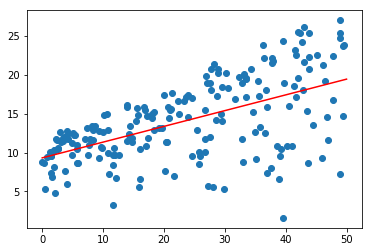

In [32]:
x = np.linspace(0, 50, 1000)
plt.scatter(data['Radio'],data['Sales'])
plt.plot(x, (compare2.params[0] + (compare2.params[1]*x)), color = 'red')

In [39]:
compare3 = smf.ols(formula='Sales ~ Newspaper', data=data).fit()
compare3.params[1]

0.054693098472273244

In [76]:
compare3.conf_int(alpha=0.05, cols=None)

,0,1
Intercept,11.125956,13.576859
Newspaper,0.022005,0.087381


In [40]:
print(compare3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Fri, 04 Oct 2019   Prob (F-statistic):            0.00115
Time:                        13:14:40   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.0

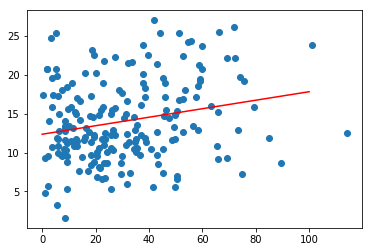

In [41]:
x = np.linspace(0, 100, 1000)
plt.scatter(data['Newspaper'],data['Sales'])
plt.plot(x, (compare3.params[0] + (compare3.params[1]*x)), color = 'red')

Answering the questions asked earlier:

Q: Is there a relationship between ads and sales?

A: There is a relationship between ads and sales but only for TV and radio. 

Q: How strong is that relationship?

A: For TV we got a r-square value of 0.612 and for radio it was 0.332.

Q: Which ad types contribute to sales?

A: Looking at the r-square values TV ads contribute more towards the sale.

Q: What is the effect of each ad type of sales?

A: TV ads had the most effect on the sales. No particular effects can be derived for Radio and Newspaper.

Q: Given ad spending in a particular market, can sales be predicted?

A: Yes, sales can be predicted for TV using the derived model.
